<a href="https://colab.research.google.com/github/prosperjohn9/web_traffic_analysis/blob/main/WebTrafficAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web Traffic Analysis and Prediction.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats
from google.colab import drive

# Suppressing warnings to make output cleaner
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/daily-website-visitors.csv")

# Show dataset
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


Data Preprocessing and Analysis: Apply data mining techniques such as clustering and time series analysis to preprocess, clean and analyze the collected website traffic data.

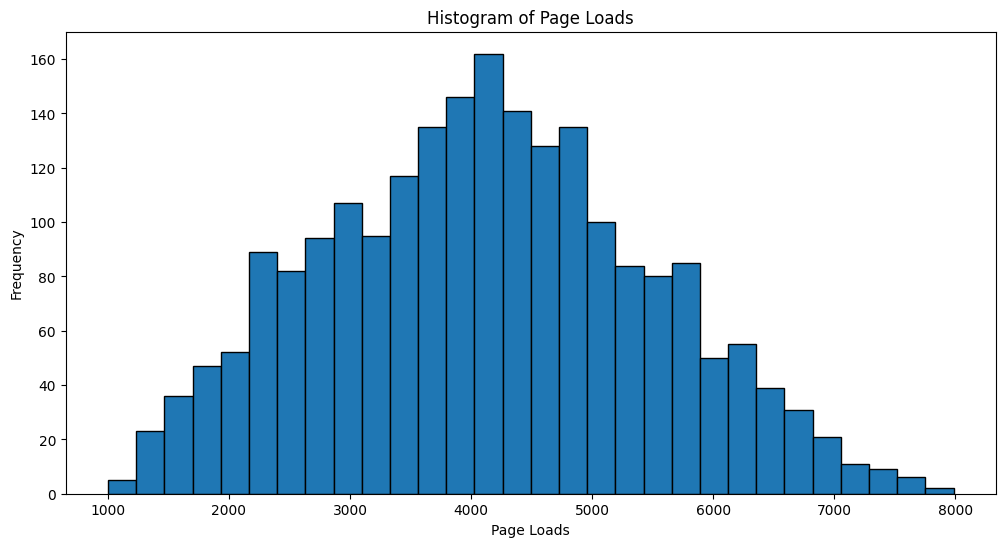

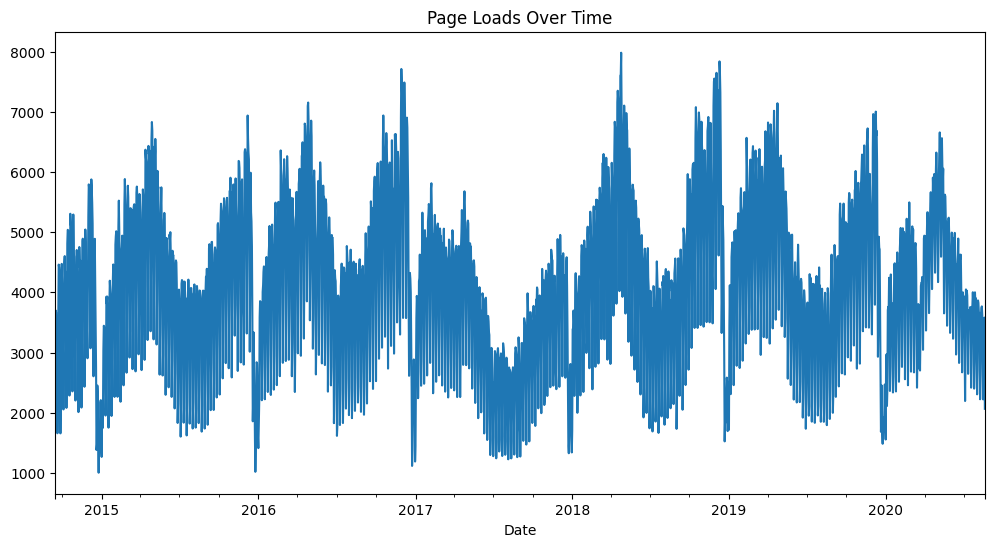

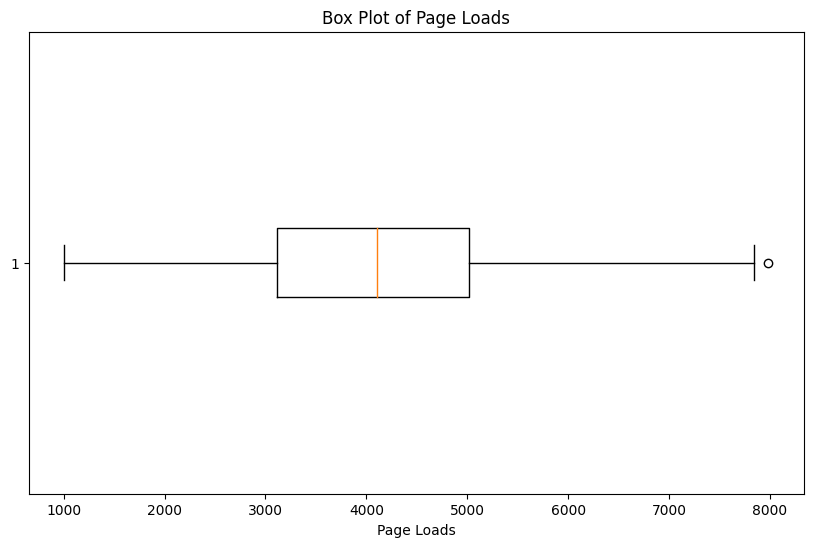

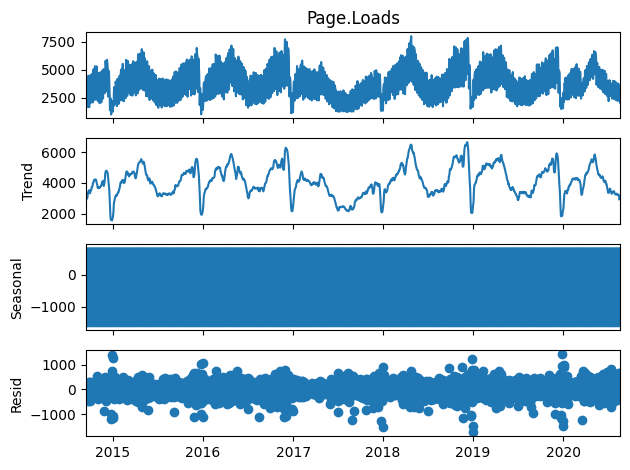

Silhouette Score: 0.54459801707506


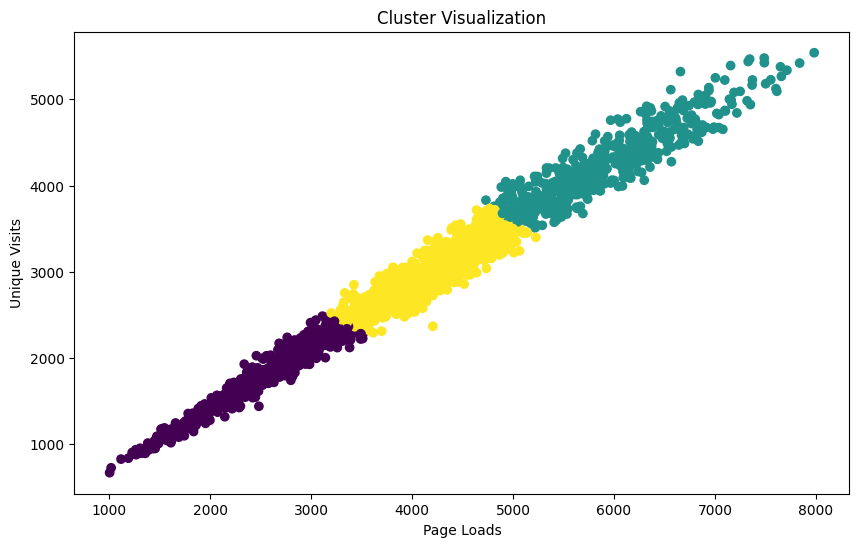

In [ ]:
# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], errors='coerce') # Convert 'Date' column to datetime format and handling missing values
data = data.dropna(subset=['Date'])
# Clean Page Loads and Unique Visits and convert to numeric data
data['Page.Loads'] = pd.to_numeric(data['Page.Loads'].str.replace(',', '') , errors='coerce')
data['Unique.Visits'] = pd.to_numeric(data['Unique.Visits'].str.replace(',', ''), errors='coerce')
data = data.fillna(method='ffill') # Handle missing data

# Advanced Exploratory Data Analysis (EDA)
# Creating a histogram to visualize the distribution of 'Page Loads'
plt.figure(figsize=(12, 6))
plt.hist(data['Page.Loads'], bins=30, edgecolor='black')
plt.title("Histogram of Page Loads")
plt.xlabel("Page Loads")
plt.ylabel('Frequency')
plt.show()

# Plotting 'Page Loads' over time to observe trends (Time Series Plot)
plt.figure(figsize=(12, 6))
data.set_index('Date')['Page.Loads'].plot(title='Page Loads Over Time')
plt.show()

# Creating a box plot to visualize the distribution of 'Page Loads'
plt.figure(figsize=(10, 6))
plt.boxplot(data['Page.Loads'], vert=False)
plt.title('Box Plot of Page Loads')
plt.xlabel('Page Loads')
plt.show()

# Time Series Decomposition
# Decomposing 'Page Loads' to observe trend, seasonality, and residuals
result = seasonal_decompose(data.set_index('Date')['Page.Loads'], model='additive')
result.plot()
plt.show()

# Clustering (KMeans) with Silhouette Score
X = data[['Page.Loads', 'Unique.Visits']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling 'Page Loads' and 'Unique Visits' for KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])  # Calculating silhouette score to evaluate the effectiveness of clustering
print('Silhouette Score:', silhouette_avg)

# Cluster Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['Page.Loads'], data['Unique.Visits'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Page Loads')
plt.ylabel('Unique Visits')
plt.title('Cluster Visualization')
plt.show()

Pattern and Trend Identification: Identify meaningful patterns, trends and anomalies in the website traffic data to uncover valuable insights for the website.

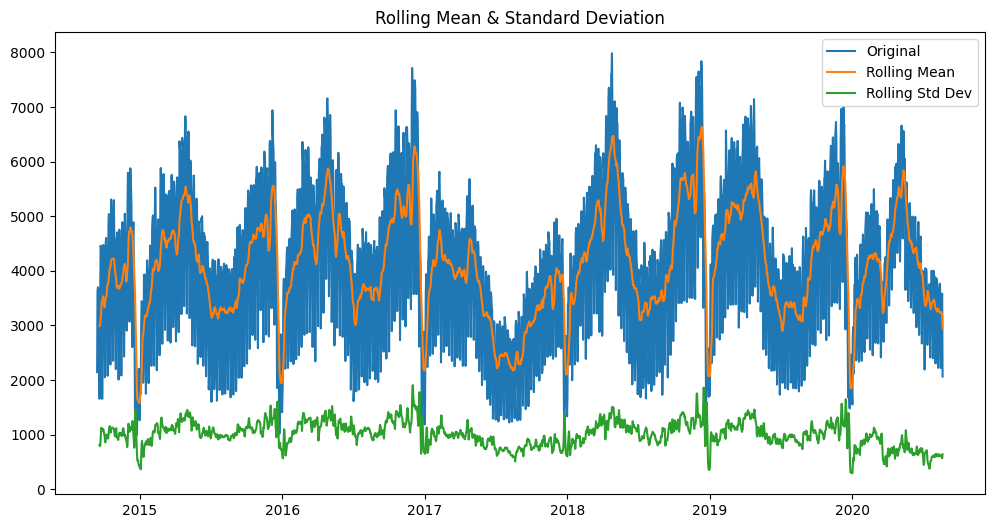

<Figure size 1200x600 with 0 Axes>

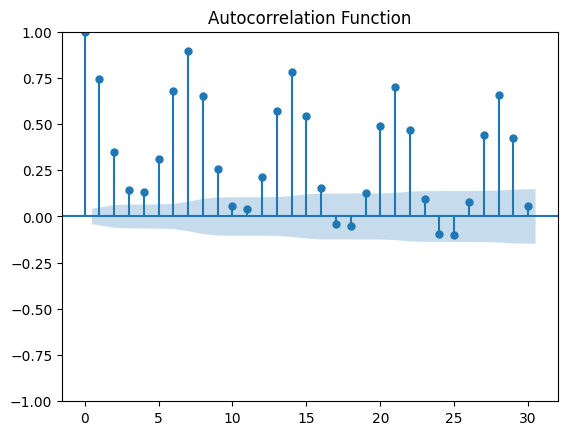

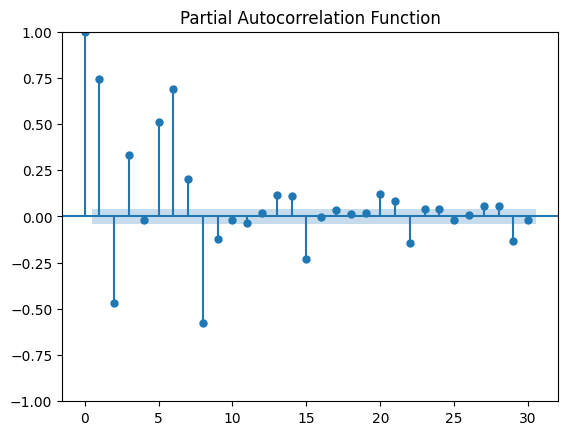

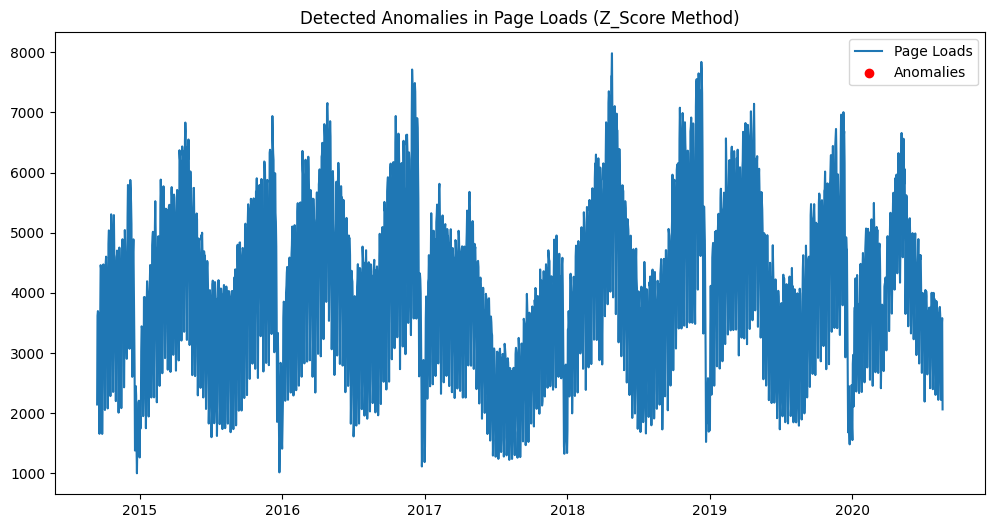

In [ ]:
# Rolling Statistics for Trend Analysis
rolling_window = 7  # 7 days window for weekly trend analysis
data['Rolling_Mean'] = data['Page.Loads'].rolling(window=rolling_window).mean()
data['Rolling_Std'] = data['Page.Loads'].rolling(window=rolling_window).std()

# Plotting original 'Page Loads' along with rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Page.Loads'], label='Original')
plt.plot(data['Date'], data['Rolling_Mean'], label='Rolling Mean')
plt.plot(data['Date'], data['Rolling_Std'], label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 6))
plot_acf(data['Page.Loads'], lags=30)
plt.title('Autocorrelation Function')
plot_pacf(data['Page.Loads'], lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()

# Anomaly Detection (Z-Score Method)
data['Z_Score'] = (data['Page.Loads'] - data['Page.Loads'].mean()) / data['Page.Loads'].std()
data['Anomaly_Z'] = data['Z_Score'].apply(lambda x: 'Anomaly' if np.abs(x) > 3 else 'Normal')

# Plotting the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Page.Loads'], label='Page Loads')
anomalies = data[data['Anomaly_Z'] == 'Anomaly']
plt.scatter(anomalies['Date'], anomalies['Page.Loads'], color='red', label='Anomalies')
plt.legend(loc='best')
plt.title('Detected Anomalies in Page Loads (Z_Score Method)')
plt.show()

Predictive Modeling: Developing predictive models for future traffic forecasting.

ARIMA MSE: 1410645.4293730468
SARIMA MSE: 1482662.906206701


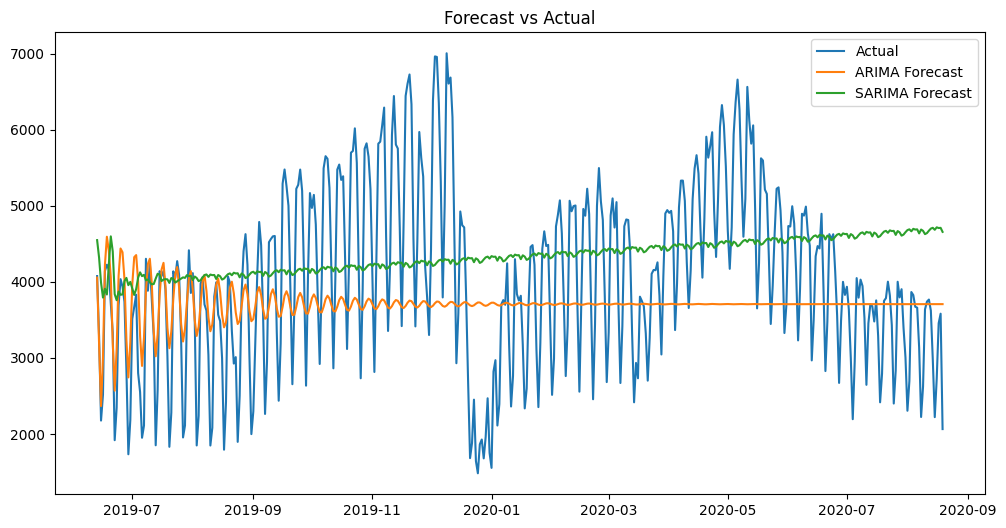

Cross-Validation MSE: 3440959.6334816846
Cross-Validation MSE: 4553596.793253369
Cross-Validation MSE: 5000200.052380586
Cross-Validation MSE: 2384703.6367731174
Cross-Validation MSE: 5748213.568516576


In [ ]:
# Data Preparation for Modeling
ts_data = data.set_index('Date')['Page.Loads']

# Splitting the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(ts_data) * split_ratio)
train, test = ts_data[:split_index], ts_data[split_index:]

# Defining ARIMA and SARIMA model orders
arima_order = (5, 1, 0)
sarima_order = (1, 1, 1, 12)

# ARIMA Model
arima_model = ARIMA(train, order=arima_order)
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

# SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test))

# Evaluation
arima_mse = mean_squared_error(test, arima_forecast)
sarima_mse = mean_squared_error(test, sarima_forecast)
print('ARIMA MSE:', arima_mse)
print('SARIMA MSE:', sarima_mse)

# Plotting the Forecasts
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('Forecast vs Actual')
plt.show()

# Cross-Validation for Time Series
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(ts_data):
    cv_train, cv_test = ts_data.iloc[train_index], ts_data.iloc[test_index]
    model = SARIMAX(cv_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit()
    cv_forecast = result.forecast(steps=len(cv_test))
    mse = mean_squared_error(cv_test, cv_forecast)
    print(f'Cross-Validation MSE: {mse}')